## The main problem people on Mars facing is which plants they could grow at different geographical regions so that the maximum number of plants would survive.  

# 1. Exploratory Data Analysis

The given target variable is 'Plant_type' and  we have to correlate each variable with the target variable for finding out the best region for the plant species to survive.
We'll be visualizing the relations between the attributes to understand our data.Also, we'll be removing the unwanted values, punctuations

## Importing packages

In [1]:
# for Data Manipulations
import numpy as np
import pandas as pd
#for Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import math
import missingno
import sklearn
#for Data Preprocessing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import string
#for Data Modeling
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


In [2]:
#for Hyperparamter tuning and Evaluation Metric
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, confusion_matrix, roc_curve, auc, \
            classification_report, recall_score, precision_recall_curve

## Reading Data from csv files

In [3]:
data = pd.read_csv(r'C:\Users\user\Desktop\capstone_train.csv')
test_data = pd.read_csv(r'C:\Users\user\Desktop\capstone_test.csv')
data.tail()

,Heigh_From_Sea_Level,Aspect,Slope,Distance_To_Water_Source,Standing_Distance_To_Water_Source,Distance_To_Road,Shadow_In_Morning,Shadow_In_Midday,Shadow_In_Evening,Distance_To_Fire,Turf,Neighbourhood_Type,Plant_Type
464804,3060,292,5,510,105,787,205,NaN,172,918,22,2,Assassin vine
464805,3149,45,16,240,31,2736,223,203.0,110,1090,22,3,Ascomoid
464806,3155,63,6,313,42,3804,226,227.0,135,3305,29,1,Ascomoid
464807,2813,200,12,201,22,2014,215,NaN,168,2151,26,3,Assassin vine
464808,2774,187,22,470,38,1284,217,250.0,156,787,13,3,Assassin vine


## Data knowabouts and description

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464809 entries, 0 to 464808
Data columns (total 13 columns):
Heigh_From_Sea_Level                 464809 non-null int64
Aspect                               464809 non-null int64
Slope                                464809 non-null int64
Distance_To_Water_Source             464809 non-null int64
Standing_Distance_To_Water_Source    464809 non-null int64
Distance_To_Road                     464809 non-null int64
Shadow_In_Morning                    464809 non-null int64
Shadow_In_Midday                     371776 non-null float64
Shadow_In_Evening                    464809 non-null int64
Distance_To_Fire                     464809 non-null int64
Turf                                 464809 non-null int64
Neighbourhood_Type                   464809 non-null int64
Plant_Type                           464809 non-null object
dtypes: float64(1), int64(11), object(1)
memory usage: 46.1+ MB


In [5]:
print(f'{data.shape[0]} samples and {data.shape[1]} features in the dataset.')
print(f"There are {data['Plant_Type'].nunique()} plant species")
print(f"There are {data['Neighbourhood_Type'].nunique()} neighbourhood types")
      

464809 samples and 13 features in the dataset.
There are 7 plant species
There are 4 neighbourhood types


In [6]:
data.describe() #All Numerical features

,Heigh_From_Sea_Level,Aspect,Slope,Distance_To_Water_Source,Standing_Distance_To_Water_Source,Distance_To_Road,Shadow_In_Morning,Shadow_In_Midday,Shadow_In_Evening,Distance_To_Fire,Turf,Neighbourhood_Type
count,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,464809.000000,371776.000000,464809.000000,464809.000000,464809.000000,464809.000000
mean,2959.483063,155.661235,14.099759,269.290644,46.390412,2351.779462,212.157323,223.311841,142.518338,1980.473990,24.370455,2.113563
std,279.781777,111.919973,7.486816,212.411427,58.240912,1559.868239,26.775574,19.744363,38.273670,1325.289344,9.478907,1.061051
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,20.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1998.000000,218.000000,226.000000,143.000000,1710.000000,29.000000,2.000000
75%,3163.000000,261.000000,18.000000,384.000000,69.000000,3331.000000,231.000000,237.000000,168.000000,2550.000000,31.000000,3.000000
max,3858.000000,360.000000,65.000000,1390.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,40.000000,4.000000


In [7]:
data.describe(include='object') #All Categorical features

,Plant_Type
count,464809
unique,7
top,Assassin vine
freq,226705


In [8]:
data['Plant_Type'].value_counts()


Assassin vine    226705
Ascomoid         169487
Basidirond        28488
Myconid:          16416
Kelpie            13931
Hangman tree       7598
Dark tree          2184
Name: Plant_Type, dtype: int64

In [9]:
test_data['Plant_Type'].value_counts()

Assassin vine    56596
Ascomoid         42353
Basidirond        7266
Myconid:          4094
Kelpie            3436
Hangman tree      1895
Dark tree          563
Name: Plant_Type, dtype: int64

##  Our data is an 'UNBALANCED' dataset and is a classic example of Multi-class Classification

## Description of Plant types(7 classes)

In [10]:
by_Plants = data.groupby("Plant_Type")

In [11]:
by_Plants.mean()

,Heigh_From_Sea_Level,Aspect,Slope,Distance_To_Water_Source,Standing_Distance_To_Water_Source,Distance_To_Road,Shadow_In_Morning,Shadow_In_Midday,Shadow_In_Evening,Distance_To_Fire,Turf,Neighbourhood_Type
Plant_Type,,,,,,,,,,,,
Ascomoid,3128.836164,156.240614,13.125957,270.632137,42.120688,2615.749391,211.982382,223.405647,143.890540,2008.010998,27.752441,1.913669
Assassin vine,2920.689226,152.045870,13.549970,279.636179,45.900501,2430.348920,213.859796,225.328735,142.946957,2168.732988,24.352895,1.946075
Basidirond,2394.853096,176.107659,20.729605,209.960334,62.244173,947.510917,202.005020,215.919091,140.546932,912.100463,6.291912,3.598322
Dark tree,2224.703297,137.334249,18.461081,107.056777,41.058608,915.533883,228.152015,216.759174,111.630037,868.170788,7.047619,4.000000
Hangman tree,2788.130824,138.492103,16.622137,213.345091,50.985917,1351.513293,223.656489,219.132581,121.746907,1572.869439,21.714530,2.204791
Kelpie,2419.471897,180.556744,19.089943,159.394085,45.225971,1037.731103,192.825712,209.693142,148.043141,1057.914077,10.223961,3.559543
Myconid:,3361.918190,153.383224,14.258589,356.267605,69.297088,2747.492934,217.025463,221.818175,134.887731,2069.888950,36.607761,2.393458


##  Checking for null values and replacing with 0's

In [12]:
data.isnull().sum() #checking for null values

Heigh_From_Sea_Level                     0
Aspect                                   0
Slope                                    0
Distance_To_Water_Source                 0
Standing_Distance_To_Water_Source        0
Distance_To_Road                         0
Shadow_In_Morning                        0
Shadow_In_Midday                     93033
Shadow_In_Evening                        0
Distance_To_Fire                         0
Turf                                     0
Neighbourhood_Type                       0
Plant_Type                               0
dtype: int64

In [13]:
data = data.fillna(0) #replacing nullvalues with 0

In [16]:
test_data = test_data.fillna(0) #replacing nullvalues with 0

In [15]:
data.isnull().sum() #checking for null values

Heigh_From_Sea_Level                 0
Aspect                               0
Slope                                0
Distance_To_Water_Source             0
Standing_Distance_To_Water_Source    0
Distance_To_Road                     0
Shadow_In_Morning                    0
Shadow_In_Midday                     0
Shadow_In_Evening                    0
Distance_To_Fire                     0
Turf                                 0
Neighbourhood_Type                   0
Plant_Type                           0
dtype: int64

## Data visualization(Univariate  and Bivariate Distribution)

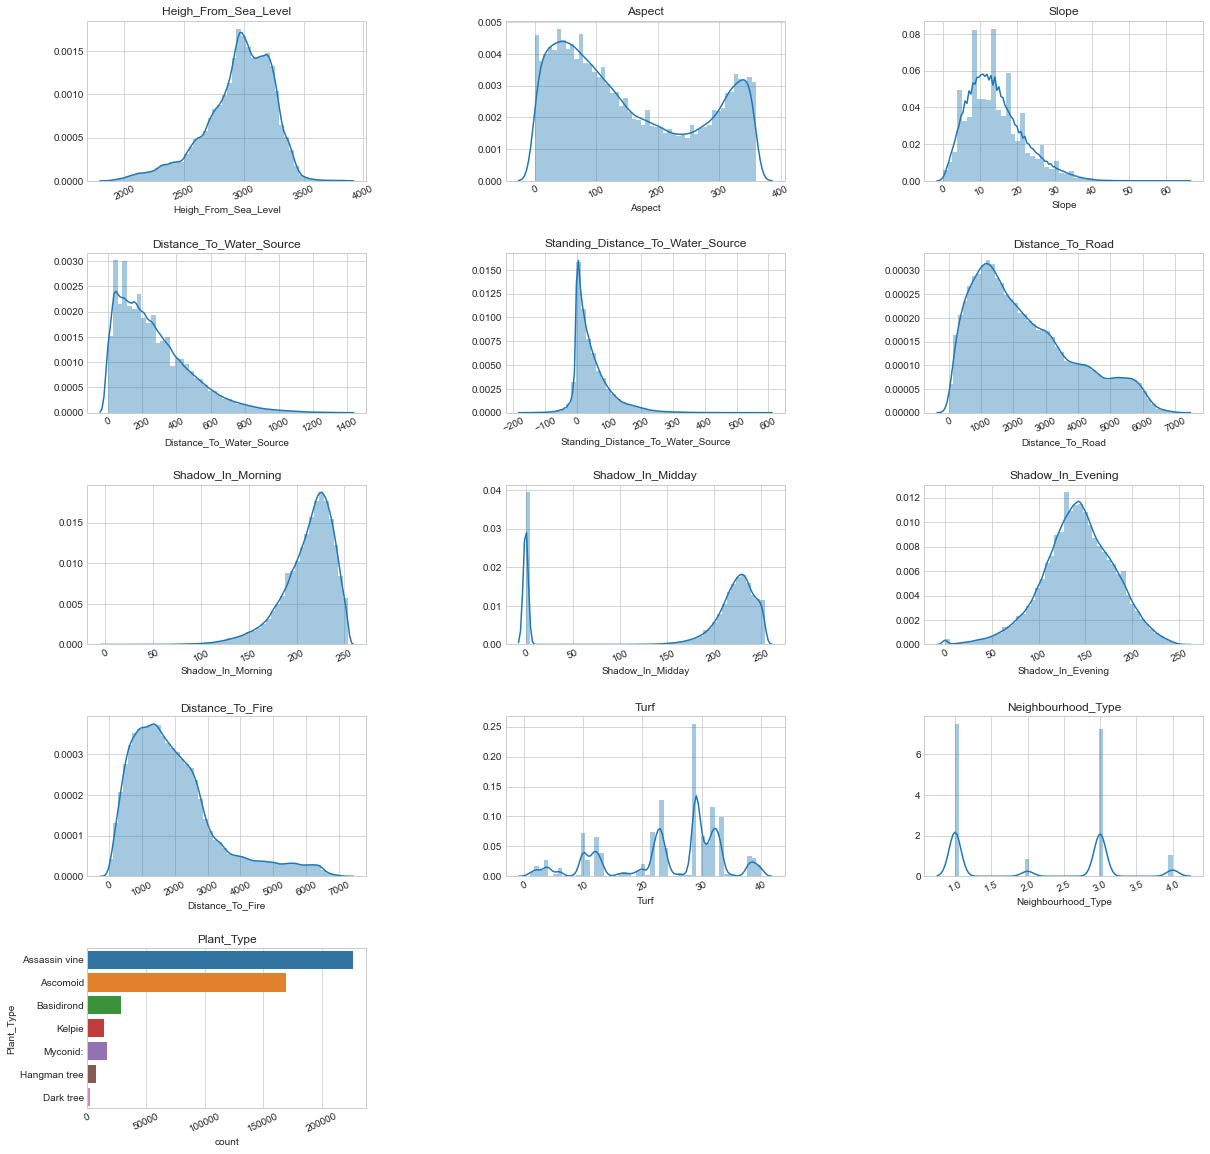

In [17]:
def plot_distribution(data, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(data.shape[1]) / cols)
    for i, column in enumerate(data.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if data.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=data)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(data[column])
            plt.xticks(rotation=25)
    
plot_distribution(data, cols=3, width=20, height=20, hspace=0.45, wspace=0.5)

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


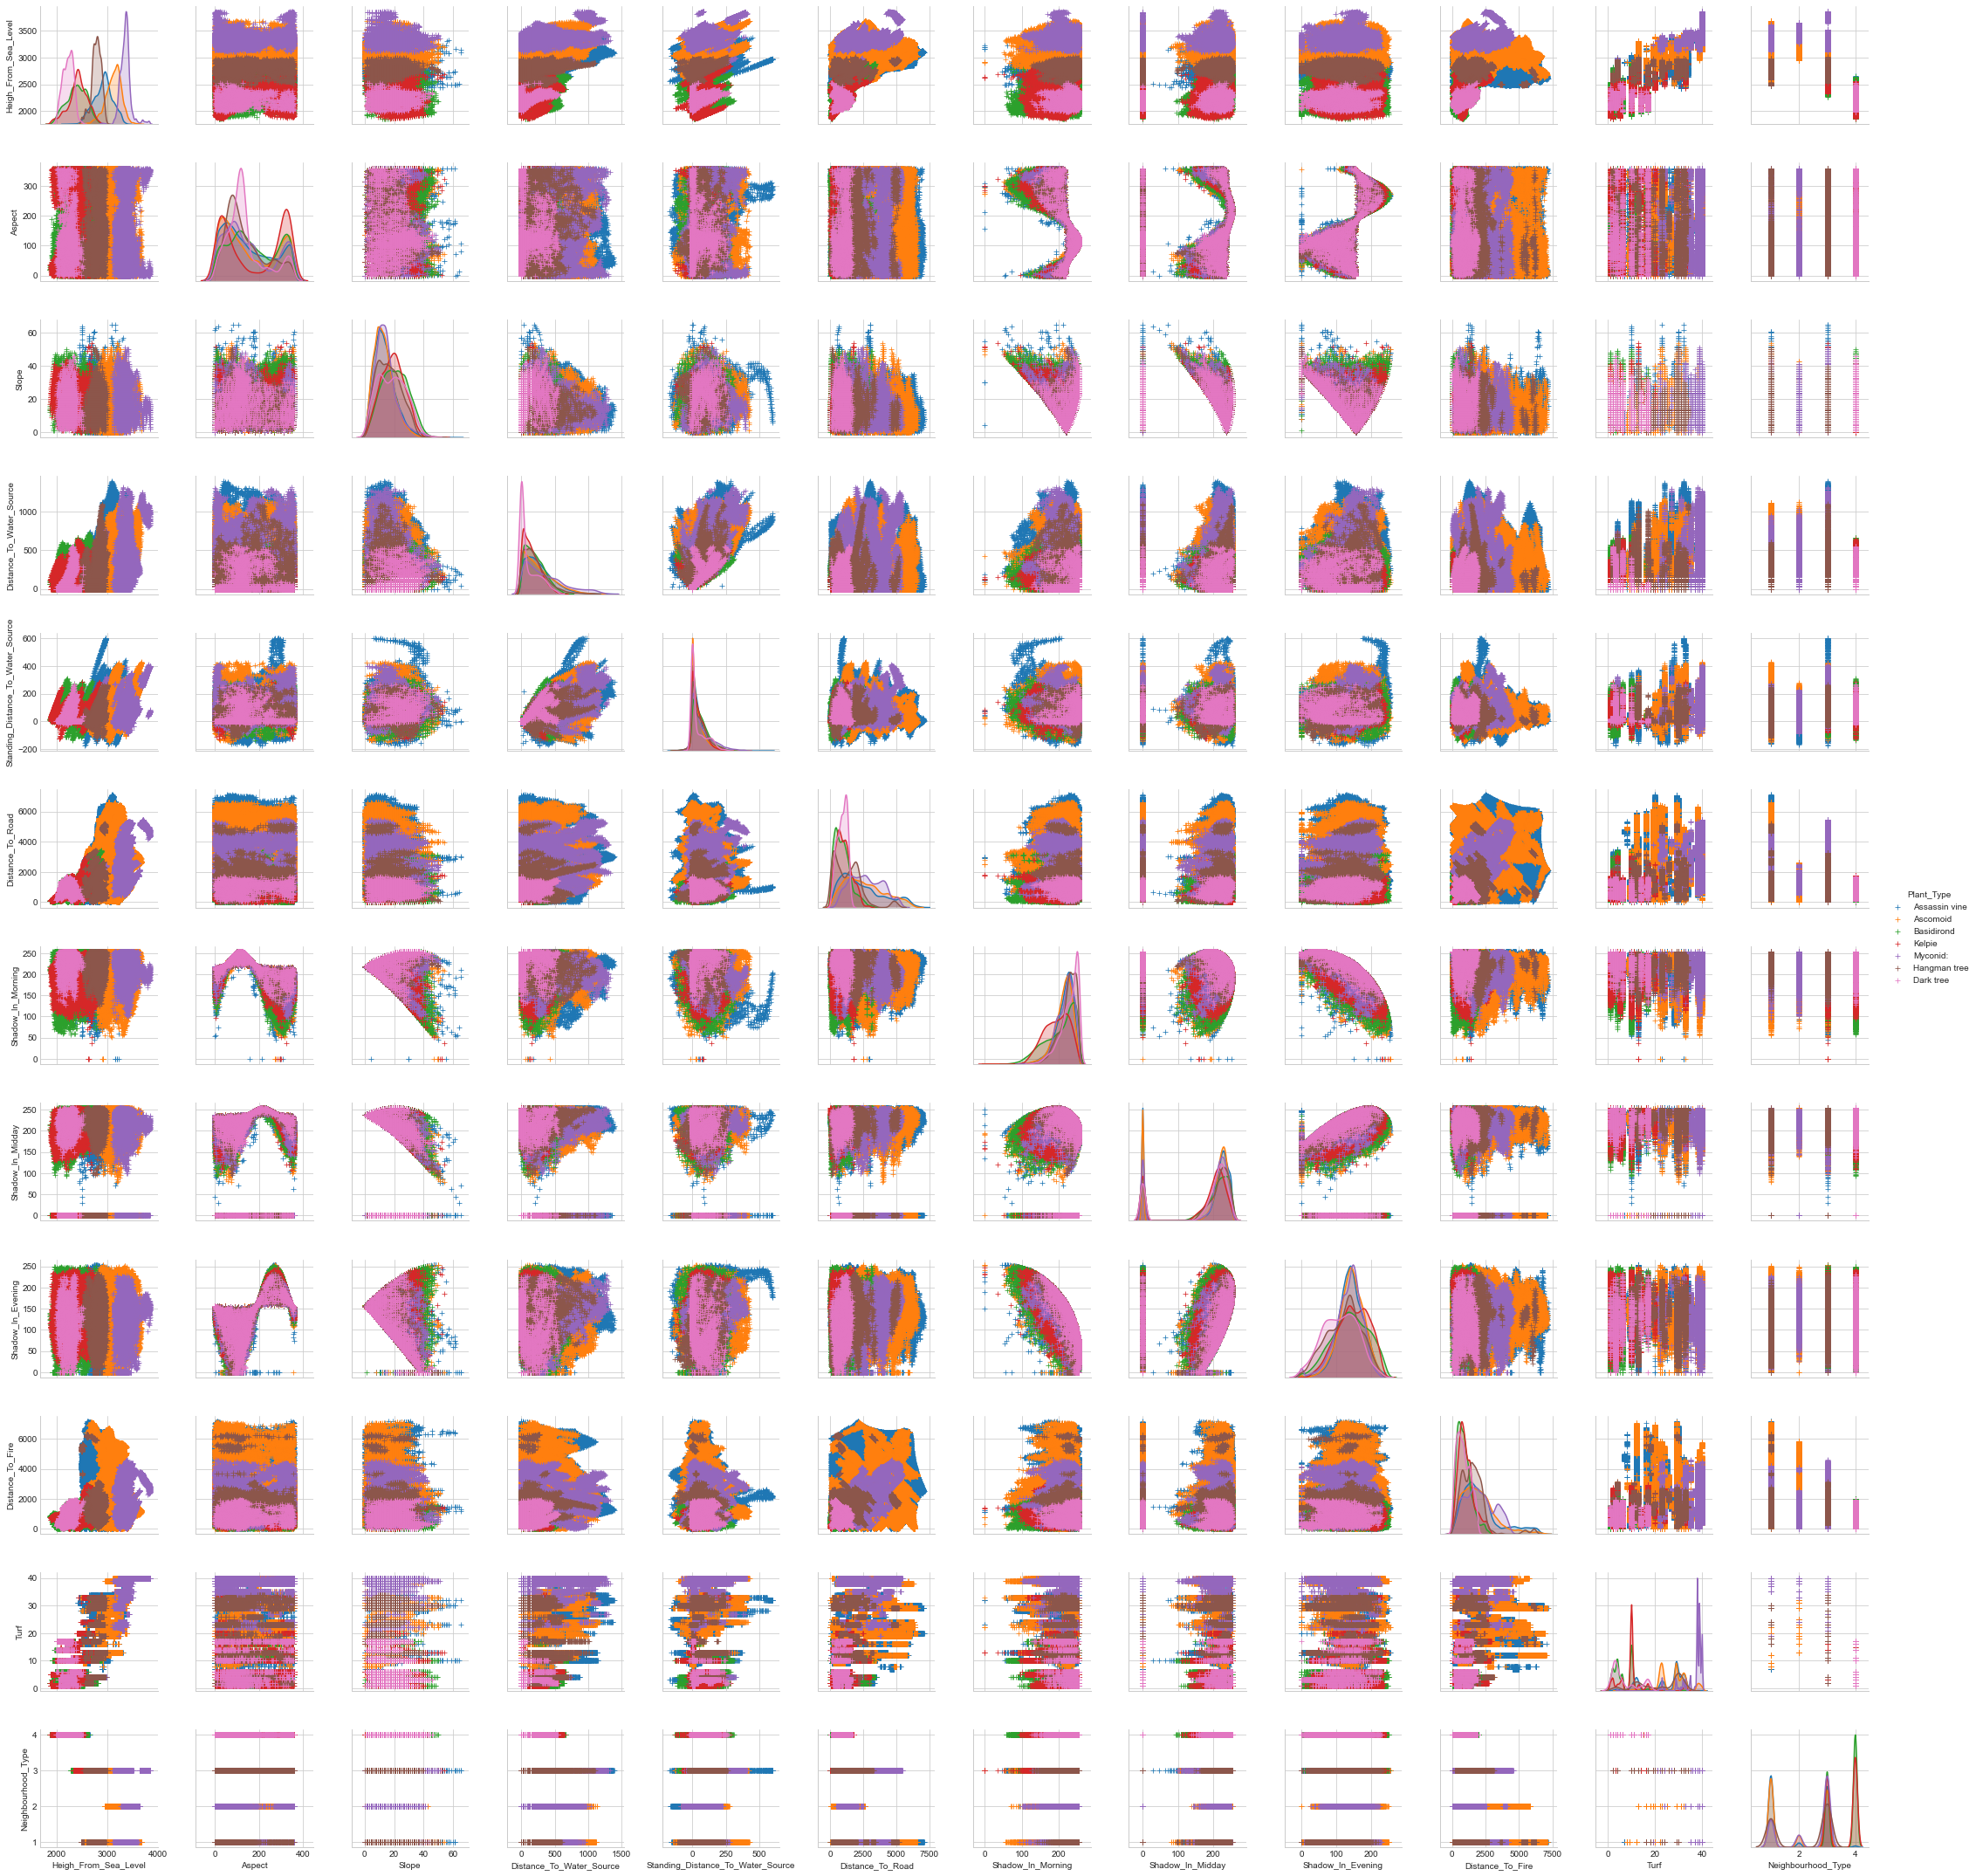

In [18]:
sns.pairplot(data, hue='Plant_Type', markers='+')

C:\Users\user\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\user\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


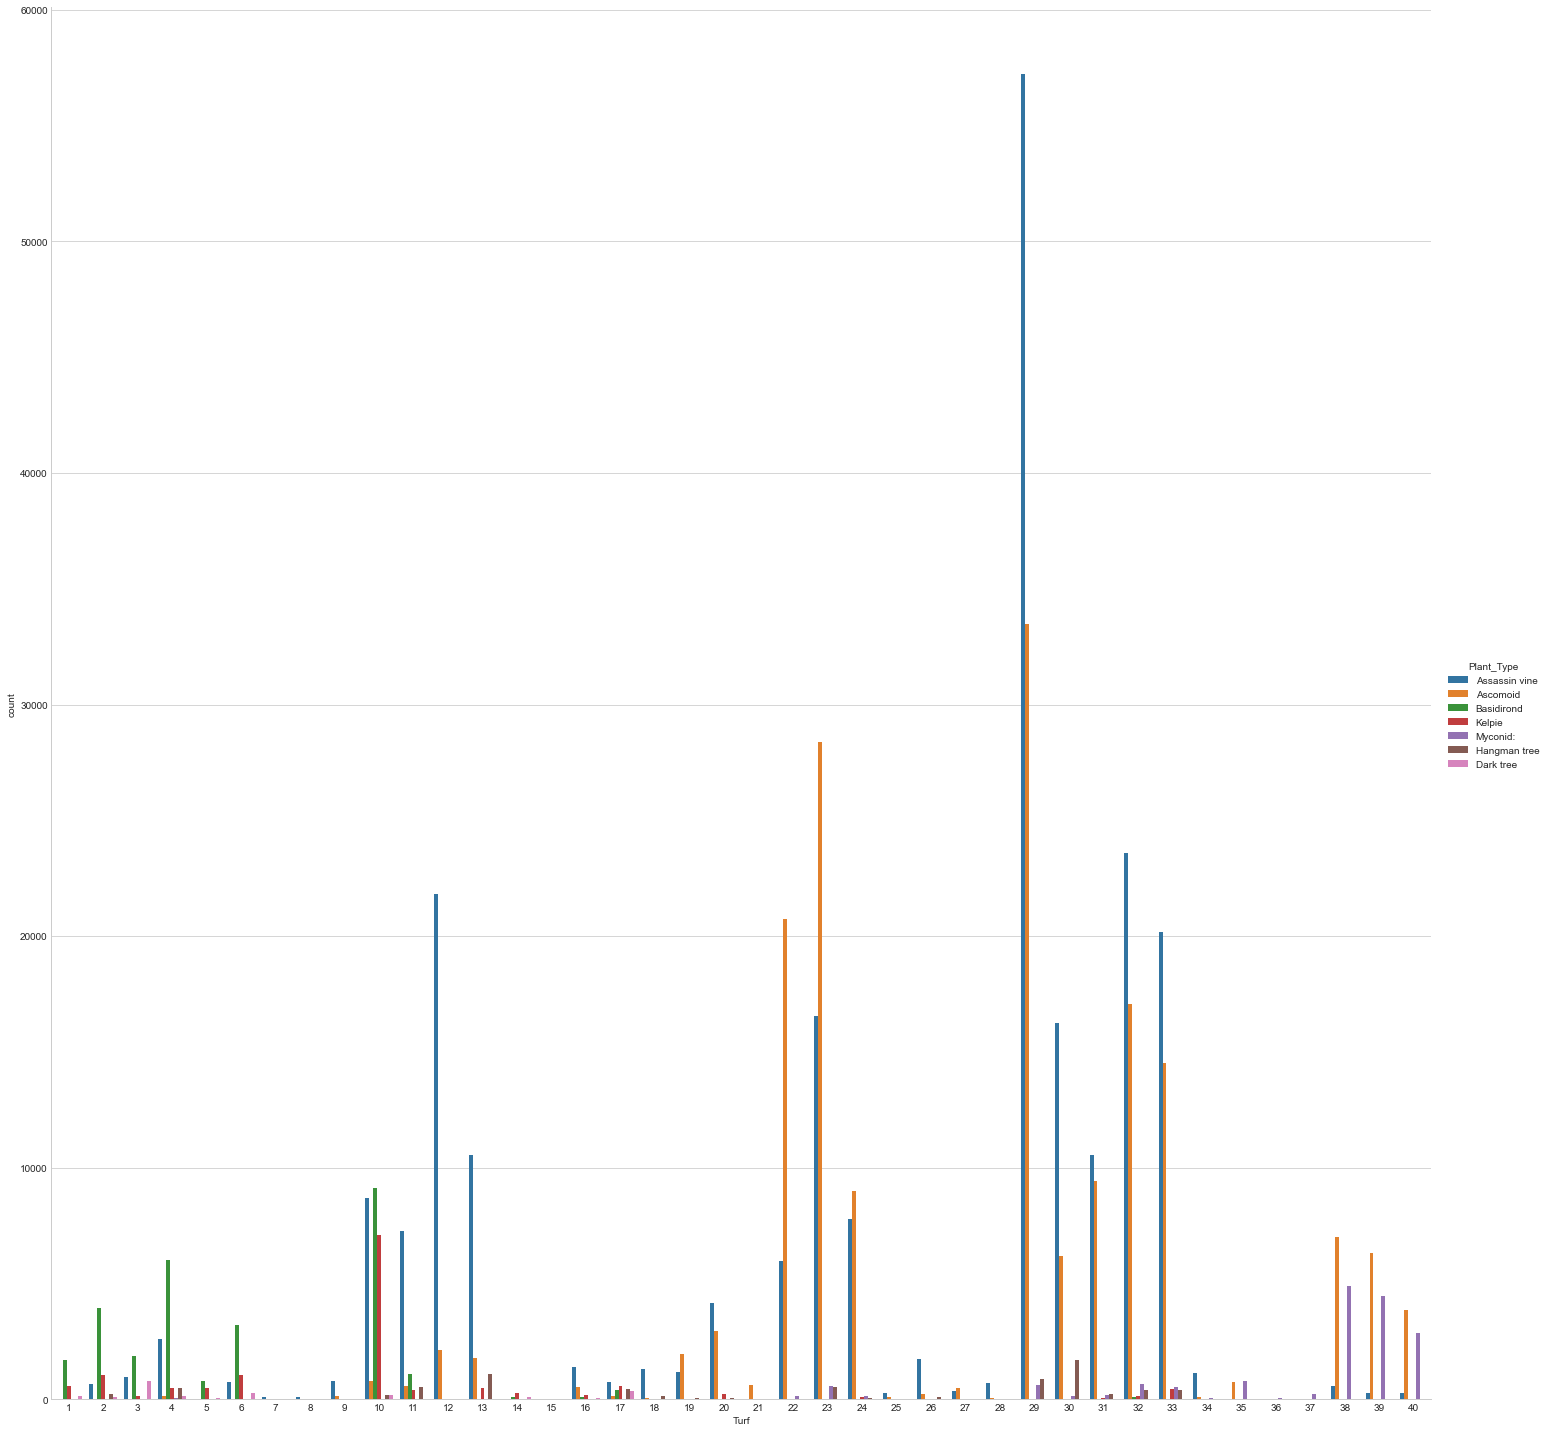

In [19]:
sns.factorplot('Turf', data=data, hue='Plant_Type', size=20, kind='count')

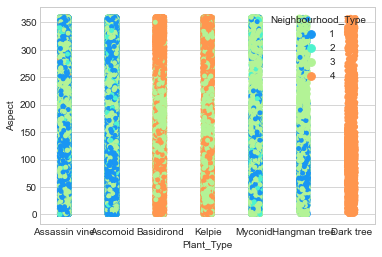

In [20]:
sns.stripplot(x="Plant_Type", y="Aspect", data=data,hue ="Neighbourhood_Type",palette='rainbow')

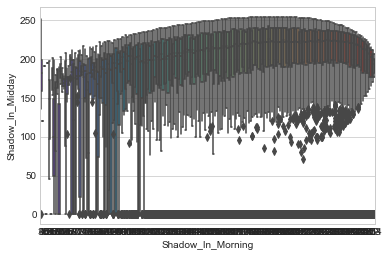

In [72]:
sns.boxplot(x="Shadow_In_Morning", y="Shadow_In_Midday", data=data,palette='rainbow')

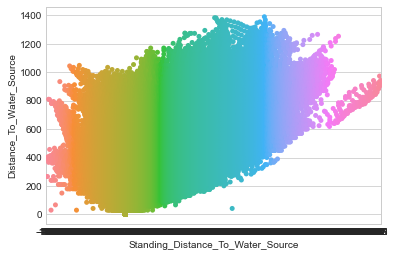

In [70]:
sns.stripplot(x="Standing_Distance_To_Water_Source", y="Distance_To_Water_Source", data=data,jitter=True)

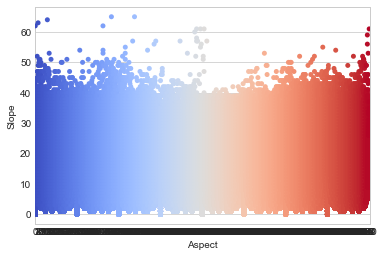

In [71]:
sns.stripplot(x="Aspect", y="Slope", data=data,jitter=True,palette='coolwarm')

## Distribution of plant_type against each attribute (Violin-plot)

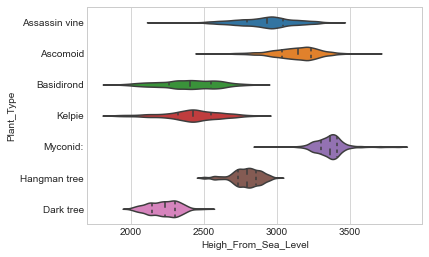

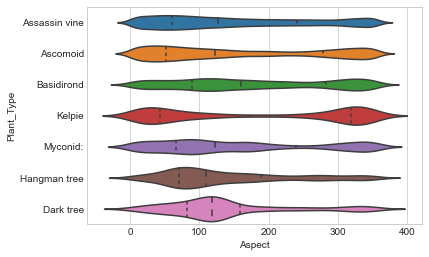

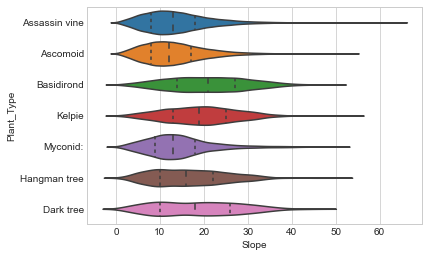

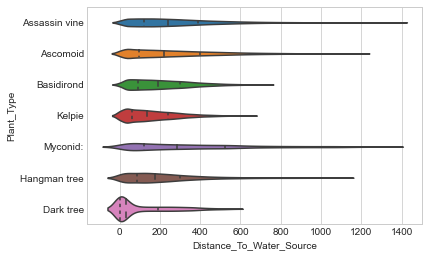

In [24]:
v = sns.violinplot(y='Plant_Type', x='Heigh_From_Sea_Level', data=data, inner='quartile')
plt.show()
v = sns.violinplot(y='Plant_Type', x='Aspect', data=data, inner='quartile')
plt.show()
v = sns.violinplot(y='Plant_Type', x='Slope', data=data, inner='quartile')
plt.show()
v = sns.violinplot(y='Plant_Type', x='Distance_To_Water_Source', data=data, inner='quartile')
plt.show()



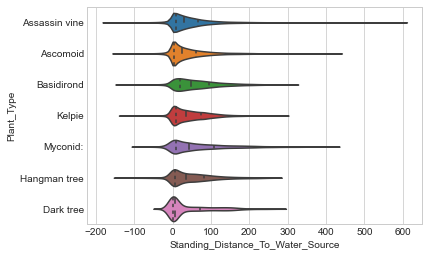

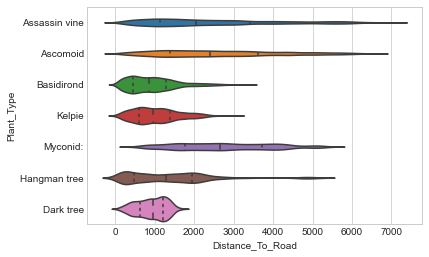

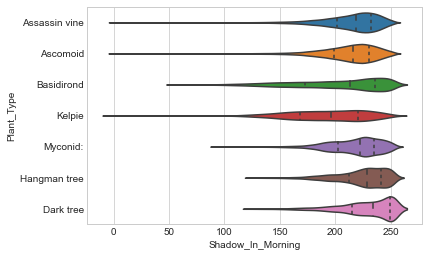

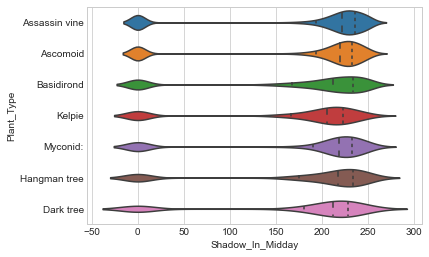

In [25]:
v = sns.violinplot(y='Plant_Type', x='Standing_Distance_To_Water_Source', data=data, inner='quartile')
plt.show()
v = sns.violinplot(y='Plant_Type', x='Distance_To_Road', data=data, inner='quartile')
plt.show()
v = sns.violinplot(y='Plant_Type', x='Shadow_In_Morning', data=data, inner='quartile')
plt.show()
v = sns.violinplot(y='Plant_Type', x='Shadow_In_Midday', data=data, inner='quartile')
plt.show()

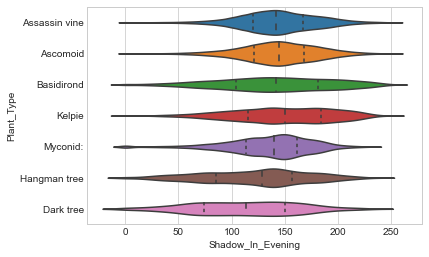

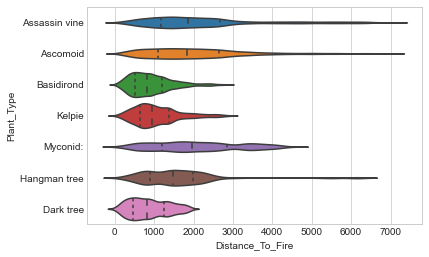

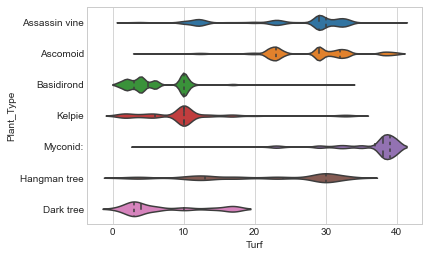

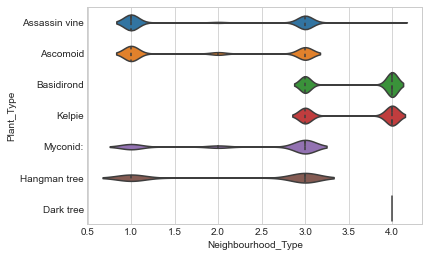

In [26]:
v = sns.violinplot(y='Plant_Type', x='Shadow_In_Evening', data=data, inner='quartile')
plt.show()
v = sns.violinplot(y='Plant_Type', x='Distance_To_Fire', data=data, inner='quartile')
plt.show()
v = sns.violinplot(y='Plant_Type', x='Turf', data=data, inner='quartile')
plt.show()
v = sns.violinplot(y='Plant_Type', x='Neighbourhood_Type', data=data, inner='quartile')
plt.show()

## Distribution of Plantypes over other attributes Report:

## Classes Distribution

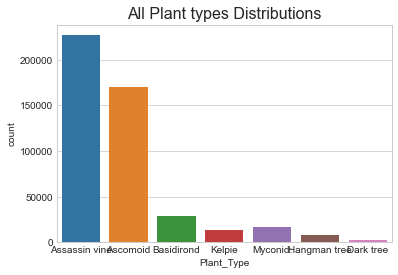

In [27]:
sns.countplot('Plant_Type', data=data)
plt.title('All Plant types Distributions', fontsize=16)
plt.show()

## Correlation Matrix


A correlation matrix is a table showing correlation coefficients between the attributes.

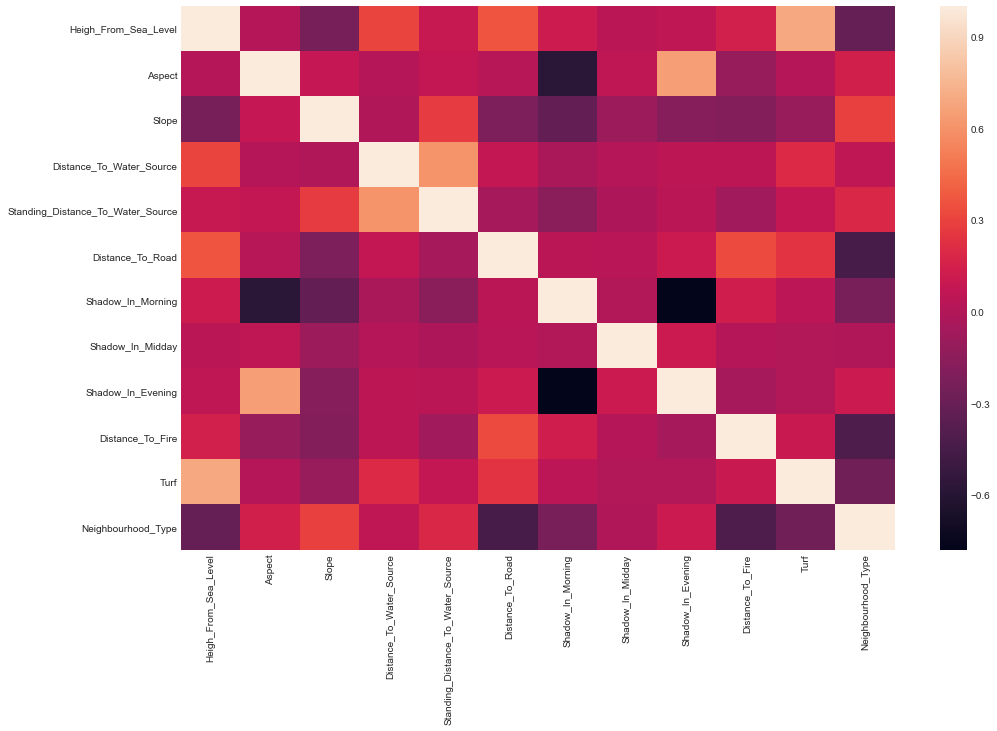

In [28]:
cor = data.corr()
plt.figure(figsize=(16,10))
sns.heatmap(cor)
plt.show()


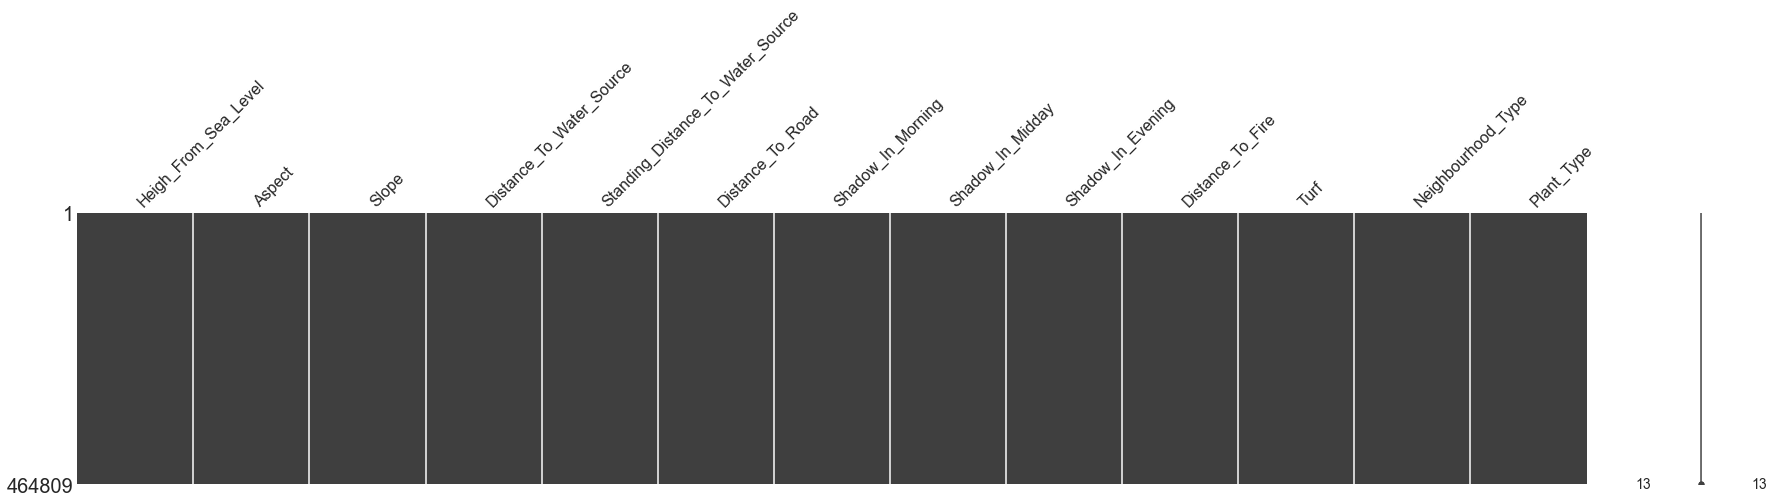

In [29]:
# How many missing values are there in our dataset?
missingno.matrix(data, figsize = (30,5))

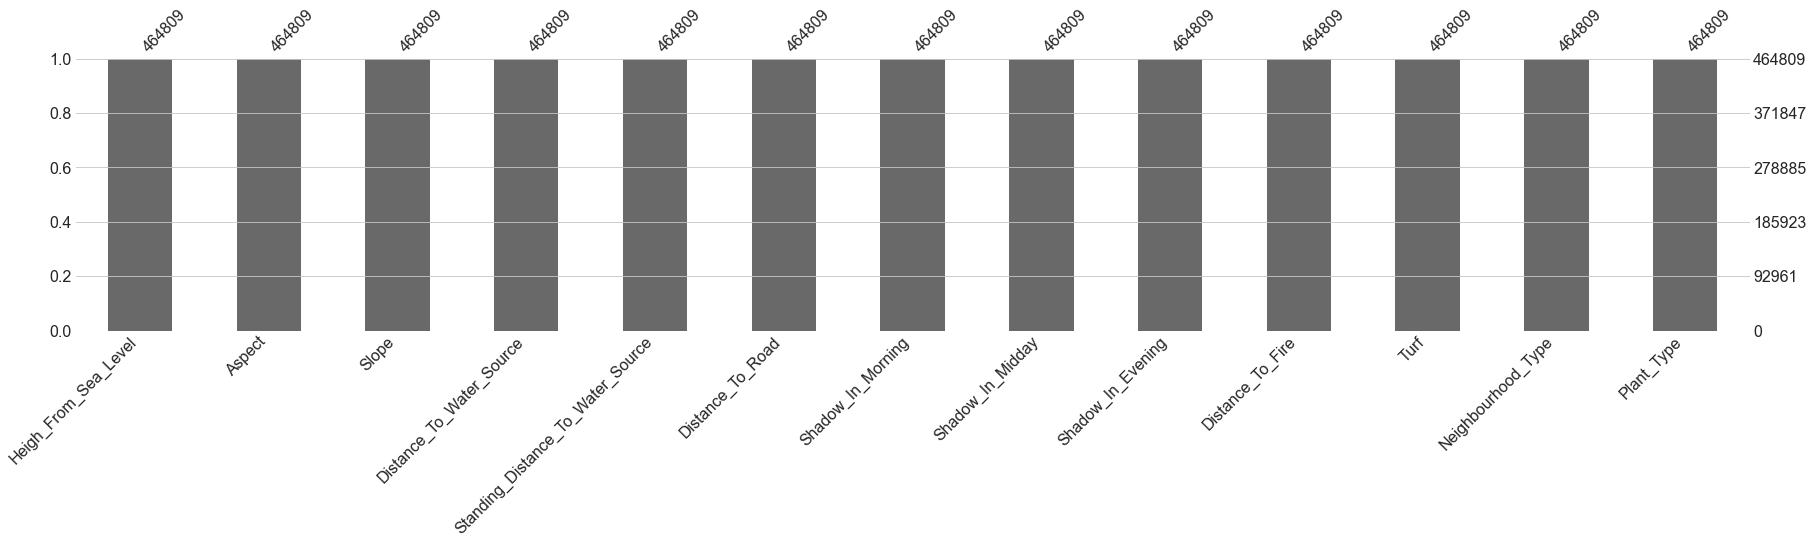

In [30]:
missingno.bar(data, sort='ascending', figsize = (30,5))

# 2. Data Pre-processing

## Removing Punctuations if any 

In [31]:
data['Plant_Type'] = data['Plant_Type'].str.replace('[^\w\s]','')

In [32]:
data['Plant_Type'].value_counts()


Assassin vine    226705
Ascomoid         169487
Basidirond        28488
Myconid           16416
Kelpie            13931
Hangman tree       7598
Dark tree          2184
Name: Plant_Type, dtype: int64

If you have noticed, there was a 'colon' after Myconid before, it disappeared now.

## Label Encoding( Encoding Categorical feature(Plant_Type))

Label Encoding is basically a method to encode 'object' type to 'integer' type. This is crucial as our entire dataset should be a list or array of numbers for the in-built predictive models perform operations and evaluate them. In our dataset we encode 'Plant_type' as it is the only attribute in 'object' type. 

In [33]:
le = sklearn.preprocessing.LabelEncoder()
data['Plant_Type'] = le.fit_transform(data['Plant_Type'])

In [34]:
test_data['Plant_Type'] = le.fit_transform(test_data['Plant_Type'])

# 3. Data preparation for Prediction Models

## Splitting the target variable from the dataset(Target variable = y) for both data and test_data

In [35]:
y = data[['Plant_Type']]
X = data.drop(columns = 'Plant_Type')

In [36]:
y_testdataset = test_data[['Plant_Type']]
X_testdataset = test_data.drop(columns = 'Plant_Type')

No missing values 

##  Splitting Data into Train and Test

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [38]:
X_train=X_train.values
X_test=X_test.values
y_train=y_train.values
y_test=y_test.values

# 4. Oversampling Data (using SMOTE)

Oversampling is one of the methods for balancing the number of samples in each class for making the model to perform better. Balancing the x_train and y_train dataframes for the model's perfect prediction of classes.SMOTE uses a nearest neighbors algorithm to generate new and synthetic data we can use for training our model.
Again, it’s important to generate the new samples only in the training set to ensure our model generalizes well to unseen data.

In [39]:
import imblearn
from imblearn.over_sampling import SMOTE

smote = SMOTE('minority')
x_smote_train0, y_smote_train0 = smote.fit_sample(X_train,y_train)

Using TensorFlow backend.
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [40]:
x_smote_train0.shape

(516843, 12)

In [41]:
y_smote_train0.shape

(516843,)

In [42]:
from collections import Counter

Counter(y_smote_train0).keys() # equals to list(set(words))


dict_keys([1, 0, 2, 6, 5, 4, 3])

In [43]:
Counter(y_smote_train0).values() 

dict_values([169895, 127019, 21425, 12390, 10457, 5762, 169895])

This is how the fix can be done: the multi class problem should be simplified by labeling all samples belonging to one class as 1, and the rest as 0. Then SMOTE could be applied for each class and the new samples could be added to the original data set.

In [44]:
x_smote_train1, y_smote_train1 = smote.fit_sample(x_smote_train0,y_smote_train0)
Counter(y_smote_train1).values() 

dict_values([169895, 127019, 21425, 12390, 10457, 169895, 169895])

In [45]:
x_sm_2, y_sm_2 = smote.fit_sample(x_smote_train1,y_smote_train1)
Counter(y_sm_2).values()

dict_values([169895, 127019, 21425, 12390, 169895, 169895, 169895])

In [46]:
x_sm_3, y_sm_3 = smote.fit_sample(x_sm_2,y_sm_2)
Counter(y_sm_3).values()

dict_values([169895, 127019, 21425, 169895, 169895, 169895, 169895])

In [47]:
x_sm_4, y_sm_4 = smote.fit_sample(x_sm_3,y_sm_3)
Counter(y_sm_4).values()

dict_values([169895, 127019, 169895, 169895, 169895, 169895, 169895])

In [48]:
X_smote_train, y_smote_train = smote.fit_sample(x_sm_4,y_sm_4)
Counter(y_smote_train).values()

dict_values([169895, 169895, 169895, 169895, 169895, 169895, 169895])

For Multi-class Classification, K-NN and Random Forest classifiers are highly recommended because of their functionality. They perform as multiple 'Binary classifiers'in general. K-NN forms a clusters separating each classes, whereas Random Forests perform multiple Decision Tree algorithm on each class.Thus I recommend these 2 to be used.

Usually, model accuracy will not be considered as model evaluation metric on imbalanced data. This is because the model will be biased towards learning the predominant class and would perform well on predicting the predominant class. Hence, the regular accuracy score will definitely be high. In such cases, you have to look out for F-measure as evaluation metric and optimize area under the roc curve. To improve the model's performance, you can try tuning model parameters using several parameter values against f-measure score and identify the right parameter values that contribute to high f-measure.

 F1 score or F measure, is a measure of a test's accuracy.The F1 Score is  2*((precision* recall)/(precision+recall))

# 5. Building Prediction Models

## Model 1 : K-Nearest Neighbor Classification 

In [49]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_smote_train,y_smote_train)
knn_predictions = knn_classifier.predict(X_test)

In [50]:
print('K-Nearest Neighbors:')
print(classification_report(y_test, knn_predictions))
print(confusion_matrix(y_test,knn_predictions))

K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     42468
           1       0.97      0.93      0.95     56810
           2       0.92      0.95      0.94      7063
           3       0.79      0.86      0.82       526
           4       0.65      0.96      0.78      1836
           5       0.85      0.94      0.89      3474
           6       0.87      0.98      0.92      4026

    accuracy                           0.94    116203
   macro avg       0.86      0.94      0.89    116203
weighted avg       0.94      0.94      0.94    116203

[[40118  1717    10     0   129     7   487]
 [ 2628 52601   376     4   763   342    96]
 [    0    29  6738    70    39   187     0]
 [    0     0    49   453     0    24     0]
 [   13    43    13     0  1761     6     0]
 [    0    22   148    48     7  3249     0]
 [   55     6     0     0     0     0  3965]]


### Predicting the test dataset(test.csv file is read into it)

In [51]:
knn_predictions = knn_classifier.predict(X_testdataset)

In [52]:
print('K-Nearest Neighbors(test data file):')
print(classification_report(y_testdataset, knn_predictions))
print(confusion_matrix(y_testdataset,knn_predictions))

K-Nearest Neighbors(test data file):
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     42353
           1       0.97      0.93      0.94     56596
           2       0.92      0.95      0.93      7266
           3       0.81      0.88      0.84       563
           4       0.67      0.96      0.79      1895
           5       0.84      0.94      0.89      3436
           6       0.88      0.99      0.93      4094

    accuracy                           0.94    116203
   macro avg       0.86      0.94      0.90    116203
weighted avg       0.94      0.94      0.94    116203

[[39942  1772    10     0   122    15   492]
 [ 2682 52371   402     3   727   333    78]
 [    0    33  6911    81    17   224     0]
 [    0     0    45   495     0    23     0]
 [    2    54    18     0  1815     6     0]
 [    0    22   142    34    11  3227     0]
 [   41     6     0     0     0     0  4047]]


### F1 score of KNN model : 0.94

  I wish to perform Hyperparameter Tuning on these models, but after oversampling of the train data , the number of samples is 3 times the original samples. So, the below method is not being implemented because of more Computational time. As our models are performing great, given this Hyperparameter tuning wouldn't make much difference. The GridSearch CV or Randomized CV are the methods of Hyperparameter tuning and is widely used for obtaining the optimal parameters of the model and estimates the best model. But the computational time of these methods is high.  

##  (Grid Search CV) Hyperparameter Tuning on K-nearest neighbors classifier

In [ ]:
knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(knn_classifier, knears_params)
grid_knears.fit(x_smote_train, y_smote_train)
# KNears besestimator
knears_neighbors = grid_knears.best_estimator_t 


##  Model 2 : Random Forest Classification

In [53]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_smote_train, y_smote_train)
rf_predictions = rf_classifier.predict(X_test)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [54]:
print('Random Forest Classifier:')
print(classification_report(y_test, rf_predictions))
print(confusion_matrix(y_test,rf_predictions))

Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95     42468
           1       0.96      0.94      0.95     56810
           2       0.93      0.97      0.95      7063
           3       0.87      0.89      0.88       526
           4       0.84      0.88      0.86      1836
           5       0.90      0.92      0.91      3474
           6       0.95      0.96      0.96      4026

    accuracy                           0.95    116203
   macro avg       0.91      0.93      0.92    116203
weighted avg       0.95      0.95      0.95    116203

[[40530  1726     2     0    39     4   167]
 [ 2443 53667   224     2   240   201    33]
 [    2    56  6821    40    15   129     0]
 [    0     0    50   467     0     9     0]
 [   15   170    16     0  1621    14     0]
 [    5    43   203    27     5  3191     0]
 [  131    15     0     0     0     0  3880]]


### Predicting the test dataset(test.csv file is read into it)

In [55]:
rf_predictions = rf_classifier.predict(X_testdataset)

In [56]:
print('Random Forest Classifier(test data file):')
print(classification_report(y_testdataset, rf_predictions))
print(confusion_matrix(y_testdataset,rf_predictions))

Random Forest Classifier(test data file):
              precision    recall  f1-score   support

           0       0.94      0.95      0.95     42353
           1       0.96      0.94      0.95     56596
           2       0.93      0.96      0.95      7266
           3       0.87      0.90      0.89       563
           4       0.86      0.90      0.88      1895
           5       0.89      0.91      0.90      3436
           6       0.96      0.96      0.96      4094

    accuracy                           0.95    116203
   macro avg       0.92      0.93      0.93    116203
weighted avg       0.95      0.95      0.95    116203

[[40360  1772     6     0    44    13   158]
 [ 2527 53453   192     1   213   187    23]
 [    0    51  6997    55     5   158     0]
 [    0     1    44   509     0     9     0]
 [    5   163    17     0  1699    11     0]
 [    1    46   228    17     7  3137     0]
 [  141    14     0     0     0     0  3939]]


### F1 score of Random Forest model : 0.95

##  (RandomizedSearchCV )Hyperparameter Tuning on Random Forest classifier

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf_random = RandomizedSearchCV(estimator = rf_classifier, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(x_train, y_train)
# Random Forest best estimator
random_forest= grid_knears.best_estimator_

## Model 3 : XGBoost Classifier

In [59]:
import xgboost as xgb

xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_smote_train, y_smote_train)
xgb_predictions = xgb_classifier.predict(X_test)

In [60]:
print('XGBoost Classifier:')
print(classification_report(y_test, xgb_predictions))
print(confusion_matrix(y_test,xgb_predictions))

XGBoost Classifier:
              precision    recall  f1-score   support

           0       0.82      0.83      0.83     42468
           1       0.88      0.83      0.85     56810
           2       0.89      0.91      0.90      7063
           3       0.81      0.93      0.87       526
           4       0.52      0.85      0.65      1836
           5       0.73      0.92      0.81      3474
           6       0.83      0.97      0.89      4026

    accuracy                           0.84    116203
   macro avg       0.78      0.89      0.83    116203
weighted avg       0.85      0.84      0.84    116203

[[35217  6329     0     0   179    31   712]
 [ 7420 46885   521     5  1227   656    96]
 [    0    85  6423    72    11   472     0]
 [    0     0    26   489     0    11     0]
 [    3   235    16     0  1564    18     0]
 [    0    40   207    34     5  3188     0]
 [  124     5     0     0     1     0  3896]]


###  F1 score of XGbosst classifier : 0.84

##  Plotting the Confusion Matrix for all 3 predictive models(KNN, RF and XGBoost)

In [61]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [62]:
actual_cm = confusion_matrix(y_testdataset, y_testdataset)
rf_smote = confusion_matrix(y_testdataset, rf_predictions)
knn_smote = confusion_matrix(y_testdataset, knn_predictions)
xbg_smote = confusion_matrix(y_testdataset, xgb_predictions)
labels = ['Ascomoid','Assasin vine','Basidirond','Dark tree', 'Hangman tree','Kelpie','Myconid']

Confusion matrix, without normalization
[[42353     0     0     0     0     0     0]
 [    0 56596     0     0     0     0     0]
 [    0     0  7266     0     0     0     0]
 [    0     0     0   563     0     0     0]
 [    0     0     0     0  1895     0     0]
 [    0     0     0     0     0  3436     0]
 [    0     0     0     0     0     0  4094]]
Confusion matrix, without normalization
[[40360  1772     6     0    44    13   158]
 [ 2527 53453   192     1   213   187    23]
 [    0    51  6997    55     5   158     0]
 [    0     1    44   509     0     9     0]
 [    5   163    17     0  1699    11     0]
 [    1    46   228    17     7  3137     0]
 [  141    14     0     0     0     0  3939]]
Confusion matrix, without normalization
[[39942  1772    10     0   122    15   492]
 [ 2682 52371   402     3   727   333    78]
 [    0    33  6911    81    17   224     0]
 [    0     0    45   495     0    23     0]
 [    2    54    18     0  1815     6     0]
 [    0    22   142    

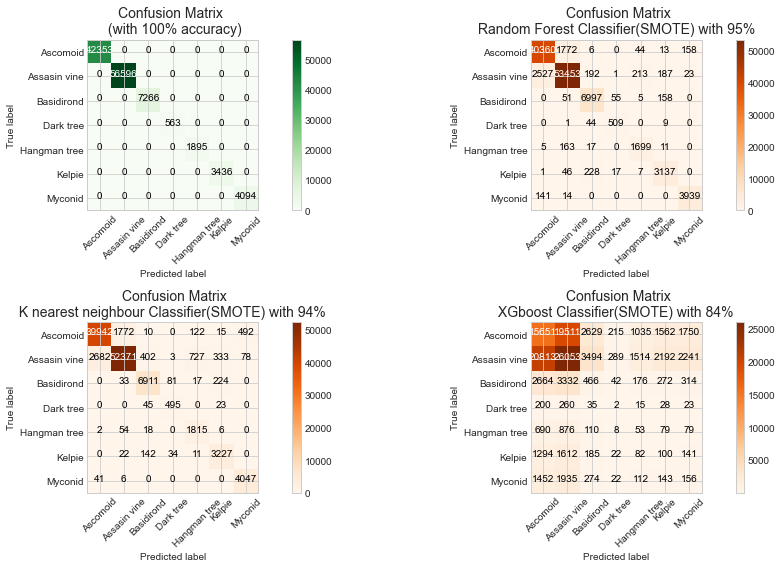

In [63]:
fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)

fig.add_subplot(222)
plot_confusion_matrix(rf_smote, labels, title=" Confusion Matrix\n Random Forest Classifier(SMOTE) with 95% ", cmap=plt.cm.Oranges)

fig.add_subplot(223)
plot_confusion_matrix(knn_smote, labels, title=" Confusion Matrix\n K nearest neighbour Classifier(SMOTE) with 94% ", cmap=plt.cm.Oranges)

fig.add_subplot(224)
plot_confusion_matrix(xbg_smote, labels, title=" Confusion Matrix\n XGboost Classifier(SMOTE) with 84% ", cmap=plt.cm.Oranges)


# 6. Best Predictive Model

###  I finally conclude this project by justifying 'Random Forest Classifier' is the best predictive model out of the 3. It produced an F-measure of 0.95 (slightly greater than K-NN F-measure). It is recommended for the people on Mars to use this model for predicting the different plant types for given geographical specifications. 